##### Copyright 2019 The TensorFlow Authors.

In [57]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# 初心者のための TensorFlow 2.0 入門

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/quickstart/beginner"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs-l10n/blob/master/site/ja/tutorials/quickstart/beginner.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs-l10n/blob/master/site/ja/tutorials/quickstart/beginner.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs-l10n/site/ja/tutorials/quickstart/beginner.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

Note: これらのドキュメントは私たちTensorFlowコミュニティが翻訳したものです。コミュニティによる 翻訳は**ベストエフォート**であるため、この翻訳が正確であることや[英語の公式ドキュメント](https://www.tensorflow.org/?hl=en)の 最新の状態を反映したものであることを保証することはできません。 この翻訳の品質を向上させるためのご意見をお持ちの方は、GitHubリポジトリ[tensorflow/docs-l10n](https://github.com/tensorflow/docs-l10n)にプルリクエストをお送りください。 コミュニティによる翻訳やレビューに参加していただける方は、 [docs-ja@tensorflow.org メーリングリスト](https://groups.google.com/a/tensorflow.org/forum/#!forum/docs-ja)にご連絡ください。

この短いイントロダクションでは [Keras](https://www.tensorflow.org/guide/keras/overview) を使って下記のことを行います。

1. 画像を分類するニューラルネットワークを構築する
2. このニューラルネットワークを訓練する
3. そして最後に、モデルの正解率を評価する

このファイルは [Google Colaboratory](https://colab.research.google.com/notebooks/welcome.ipynb) の notebook ファイルです。 Python プログラムはブラウザ上で直接実行されます。TensorFlow を学んだり使ったりするには最良の方法です。Google Colab のnotebook の実行方法は以下のとおりです。

1. Pythonランタイムへの接続：メニューバーの右上で「接続」を選択します。
2. ノートブックのコードセルをすべて実行：「ランタイム」メニューから「すべてのセルを実行」を選択します。

##1. ライブラリのロード

TensorFlow 2 のパッケージをダウンロードしてインストールします。プログラムに TensorFlow をインポートします。

Note: TensorFlow 2 パッケージをインストールするためには `pip` をアップグレードしてください。詳細は [インストール](https://www.tensorflow.org/install)を参照ください。

In [58]:
import tensorflow as tf

##2. データセットの読み込み

[MNIST データセット](http://yann.lecun.com/exdb/mnist/)をロードして準備します。

In [59]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
#x_train, x_test = x_train / 255.0, x_test / 255.0

In [60]:
print("x_train : ", x_train.shape)
print("y_train : ", y_train.shape)
print("x_test : ", x_test.shape)
print("y_test : ", y_test.shape)

x_train :  (60000, 28, 28)
y_train :  (60000,)
x_test :  (10000, 28, 28)
y_test :  (10000,)


matoplotlibライブラリをインポートして、X(白黒画像)とy(ラベル)を見てみましょう．

In [61]:
import matplotlib
import matplotlib.pyplot as plt

y_train (i=0):  5
x_train (i=0): 


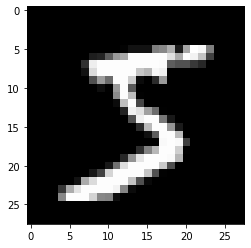

y_train (i=10):  3
x_train (i=10): 


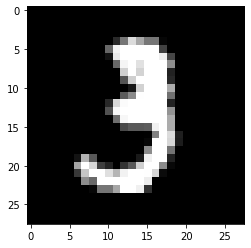

y_train (i=100):  5
x_train (i=100): 


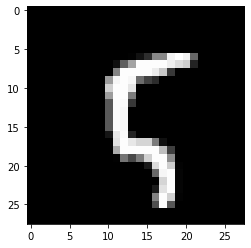

In [62]:
 for i in [0,10,100]:
    print("y_train", "(i="+str(i)+"): ", y_train[i])
    print("x_train", "(i="+str(i)+"): ")    
    plt.imshow(x_train[i], cmap='gray')
    plt.show()

##3. 画像データの正規化

一般に，「(扱う)データの値を，何らかの基準に基づいて整える」処理を正規化(Normalization, Scalijng)といいます．代表的な正規化手法としては以下2つが挙げられます．

1. min-max normalization

  最小値が0, 最大値が1になるように変換する

  x_new = (x - x_min) / (x_max - x_min)

2. z-score normalization

  平均が0, 標準偏差が1になるよう変換する

  x_new = (x - x_mean) / x_std

MNIST Datasetに含まれる画像データでは，各画素の値が「0以上255以下」の8bit整数で表現されています．今回は，これにmin-max normalizationを適用することで，値の範囲を「0~1」に限定させます．

In [63]:
print("x_train min", x_train.min())
print("x_train max", x_train.max())

x_train min 0
x_train max 255


In [64]:
# Min-Max Normalization
x_train, x_test = x_train / 255.0, x_test / 255.0

In [65]:
print("x_train min", x_train.min())
print("x_train max", x_train.max())

x_train min 0.0
x_train max 1.0


##4. モデルの作成

層を積み重ねて`tf.keras.Sequential`モデルを構築します。訓練のためにオプティマイザと損失関数を選びます。

In [66]:
model = tf.keras.models.Sequential([
  # (None, 28, 28) -> (None, 784)
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  # Layer1: Linear mapping: (None, 784) -> (None, 128)
  # Activation function: ReLU
  tf.keras.layers.Dense(128, activation='relu'),
  # Layer2: Linear mapping: (None, 128) -> (None, 128)
  tf.keras.layers.Dropout(0.2),
  # Layer3: Linear mapping: (None, 128) -> (None, 10)
  tf.keras.layers.Dense(10)
])

In [67]:
# View model architecture
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


モデルはそれぞれの標本について、クラスごとに"[ロジット](https://developers.google.com/machine-learning/glossary#logits)"や"[対数オッズ比](https://developers.google.com/machine-learning/glossary#log-odds)"と呼ばれるスコアを算出します。

※ロジット：

分類モデルが生成する生の（正規化されていない）予測のベクトル。これは通常、正規化関数に渡されます。モデルが多クラス分類 問題を解いている場合、ロジットは通常、softmax関数への入力になり ます。次に、softmax関数は、可能なクラスごとに1つの値を持つ（正規化された）確率のベクトルを生成します。

以下は１番目のデータをモデルに入力した場合の０～９の予測ベクトル

In [68]:
predictions = model(x_train[:1]).numpy()
predictions

array([[-0.46450573,  0.48142344,  0.32512197,  0.52060807, -0.7118379 ,
         0.711878  ,  0.41612422, -0.1082752 ,  0.08021271, -0.32388636]],
      dtype=float32)

`tf.nn.softmax` 関数はクラスごとにこれらのロジットを "確率" に変換します。

確率は全部足すと1.0になります。

In [69]:
tf.nn.softmax(predictions).numpy()

array([[0.05209725, 0.1341611 , 0.11474817, 0.13952251, 0.04068177,
        0.16893193, 0.12568039, 0.07439157, 0.08982205, 0.05996323]],
      dtype=float32)

Note: `tf.nn.softmax` をネットワークの最終レイヤーに対する活性化関数として組み込むことは可能です。これはモデルの出力に対して直接的に解釈できるようにする一方で、ソフトマックスの出力を用いる場合、すべてのモデルに対して正確で数値的安定に損失を計算することが不可能なため、このアプローチは推奨されません。

`losses.SparseCategoricalCrossentropy` 損失関数は、ロジットと `True` の インデックスに関するベクトルを入力にとり、それぞれの標本についてクラスごとに損失のスカラーを返します。

In [70]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

この損失は、クラスが正しい確率の対数をとって符号を反転させたものです。この値はモデルがこのクラスが正しいと確信しているときに 0 になります。

この訓練されていないモデルはランダムに近い確率 (それぞれのクラスについて 1/10) を出力します、最初の損失は `-tf.log(1/10) ~= 2.3` に近い値になるはずです。

In [71]:
loss_fn(y_train[:1], predictions).numpy()

1.7782594

In [72]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

##5. モデルの学習

`Model.fit` メソッドは損失を最小化するようにモデルのパラメータを調整します。

バッチサイズはデフォルト＝32

＊バッチサイズとは？

ディープラーニングでは、損失関数が最小となる最適なパラメータ（重み、バイアス）を求めますが、全ての訓練データに対する損失関数を一度に計算するには時間がかかります。そのため、全ての訓練データの中からサブセットととして一部を選び出し全体の近似とします。
この幾つかに分けたぞれぞれのサブセットに含まれるデータの数をバッチサイズと呼びます。例えば、1,000件のデータセットを200件ずつのサブセットに分ける場合、バッチサイズは200となります。

＊エポック数とは？

学習において訓練データをすべて使い切った時の回数。以下の場合では、MNIST：60000データを5回学習することになります。

In [73]:
history = model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2941 - accuracy: 0.9157
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1432 - accuracy: 0.9572
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1058 - accuracy: 0.9680
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0879 - accuracy: 0.9725
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0761 - accuracy: 0.9768


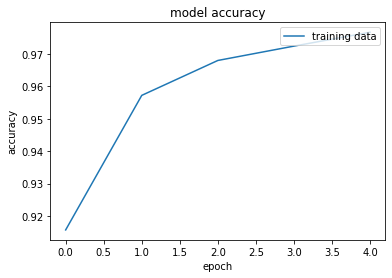

In [74]:
#print('history:', history.history)
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training data'], loc='upper right')
plt.show()

##6. 学習済みモデルの評価

`Model.evaluate` メソッドはモデルの性能を検査します。これには通常 "[検証用データセット](https://developers.google.com/machine-learning/glossary#validation-set)" または "[テストデータセット](https://developers.google.com/machine-learning/glossary#test-set)" を用います。

In [75]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - loss: 0.0794 - accuracy: 0.9758 - 532ms/epoch - 2ms/step


[0.0793873518705368, 0.9757999777793884]

この画像識別器はこのデータセットにおいておよそ 98% の正解率にまで訓練されました。更に学ぶためには [TensorFlow tutorials](https://www.tensorflow.org/tutorials/) を参照ください。

モデルが確率を返すようにしたい場合には、モデルをラップしてソフトマックス関数を適用してください。

In [76]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [77]:
probability_model(x_test[:5])

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[1.51402695e-08, 3.84528587e-09, 3.27943371e-06, 1.26572908e-04,
        2.06467048e-12, 1.50315049e-08, 1.77867627e-12, 9.99867678e-01,
        1.41708017e-06, 9.16421925e-07],
       [3.22125304e-09, 5.92433162e-06, 9.99988556e-01, 4.58886598e-06,
        1.13063056e-16, 6.26519579e-07, 1.49991153e-09, 5.38774246e-14,
        3.08150760e-07, 1.00331429e-12],
       [1.19973592e-07, 9.98558104e-01, 2.50147823e-05, 2.31570880e-06,
        4.86521421e-05, 2.03608101e-06, 1.61609648e-06, 1.26985833e-03,
        9.09515729e-05, 1.37837139e-06],
       [9.99907851e-01, 1.00543076e-08, 6.01733018e-06, 1.51136987e-08,
        2.39207566e-07, 1.09541858e-07, 1.42630752e-05, 6.55634212e-05,
        3.55125862e-09, 5.98700353e-06],
       [1.26183677e-05, 1.09532081e-08, 4.96457651e-05, 2.43405225e-07,
        9.95315433e-01, 7.69420012e-07, 1.11549685e-04, 2.93517114e-05,
        5.33108105e-05, 4.42704419e-03]], dtype=float32)>

##7. 学習済みモデルの保存

In [78]:
# save model
!mkdir -p saved_model
model.save('saved_model/mnist-model.h5')